# Imports

In [192]:
import cv2
import glob
import time
import pickle
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.measurements import label as sclabel

# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

from moviepy.editor import VideoFileClip


# Evaluating the labelled data

## Reading the training data

In [69]:
# Read in cars and notcars
vehicles = glob.glob('data/vehicles/*/*.png')
non_vehicles = glob.glob('data/non-vehicles/*/*.png')

print("Loading", len(vehicles), "vehicle images...")
print("Loading", len(non_vehicles), "non-vehicle images...")

cars = []
non_cars = []
for image in non_vehicles:
    non_cars.append(image)
for image in vehicles:
    cars.append(image)


Loading 8792 vehicle images...
Loading 8968 non-vehicle images...


## Trimming the arrays to have same number of cars and non cars

In [70]:
# image_count = 8792
# cars = cars[0:image_count]
# non_cars = non_cars[0:image_count]

print("Loading", len(cars), "vehicle images...")
print("Loading", len(non_cars), "non-vehicle images...")


Loading 8792 vehicle images...
Loading 8968 non-vehicle images...


# HOG Features Extraction

## Defining HOG function

In [71]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, 
                                  feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, 
                       feature_vector=feature_vec)
        return features

## Evaulating the correct color space

In [72]:
def plot_1_image(img1,text1):
    f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
    ax1.imshow(img1)
    ax1.set_title(text1, fontsize=30)
    
def plot_2_images(img1,text1,img2,text2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img1)
    ax1.set_title(text1, fontsize=30)
    ax2.imshow(img2)
    ax2.set_title(text2, fontsize=30)
    
def plot_4_images(img1,text1,img2,text2,img3,text3,img4,text4):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
    ax1.imshow(img1)
    ax1.set_title(text1, fontsize=30)
    ax2.imshow(img2)
    ax2.set_title(text2, fontsize=30)
    ax3.imshow(img3)
    ax3.set_title(text3, fontsize=30)
    ax4.imshow(img4)
    ax4.set_title(text4, fontsize=30)
    

In [73]:
def get_image(path):
    return cv2.imread(path)

## Hog visualization in RGB

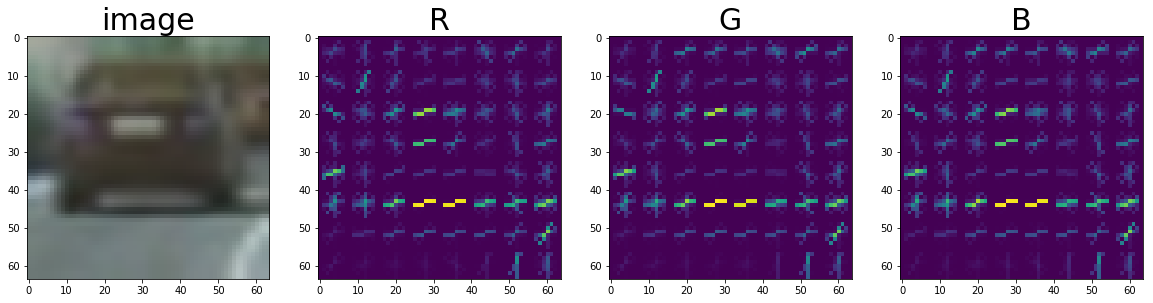

In [74]:
image = get_image(cars[1])
featues, hog_image_r = get_hog_features(image[:,:,0],9,8,2,True,True)
featues, hog_image_g = get_hog_features(image[:,:,1],9,8,2,True,True)
featues, hog_image_b = get_hog_features(image[:,:,2],9,8,2,True,True)
plot_4_images(image,'image',hog_image_r,'R',hog_image_g,'G',hog_image_b,'B')

## Hog visualization in HSV

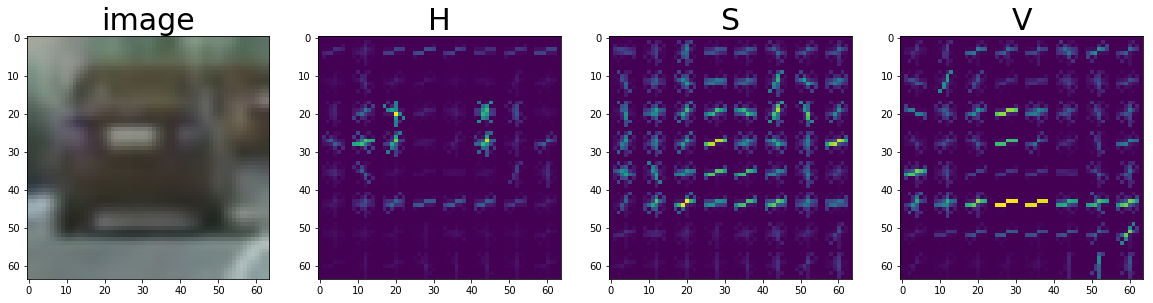

In [75]:
image = get_image(cars[1])
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
featues, hog_image_r = get_hog_features(image[:,:,0],9,8,2,True,True)
featues, hog_image_g = get_hog_features(image[:,:,1],9,8,2,True,True)
featues, hog_image_b = get_hog_features(image[:,:,2],9,8,2,True,True)
plot_4_images(get_image(cars[0]),'image',hog_image_r,'H',hog_image_g,'S',hog_image_b,'V')

## Hog visualization in LUV

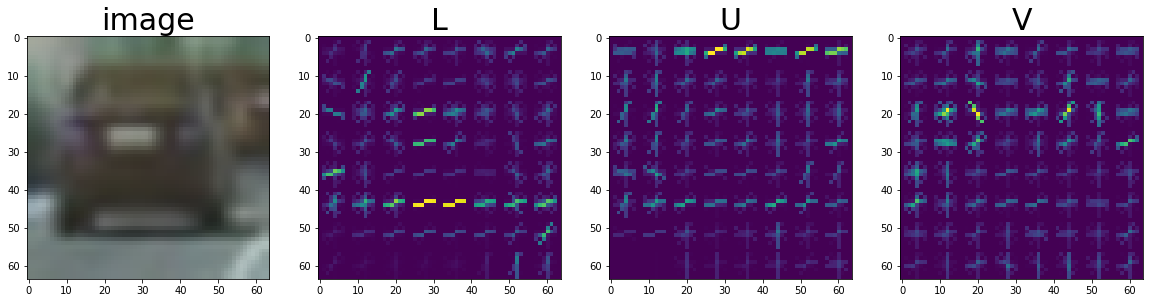

In [76]:
image = get_image(cars[1])
image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
featues, hog_image_r = get_hog_features(image[:,:,0],9,8,2,True,True)
featues, hog_image_g = get_hog_features(image[:,:,1],9,8,2,True,True)
featues, hog_image_b = get_hog_features(image[:,:,2],9,8,2,True,True)
plot_4_images(get_image(cars[0]),'image',hog_image_r,'L',hog_image_g,'U',hog_image_b,'V')

## Hog visualization in HLS

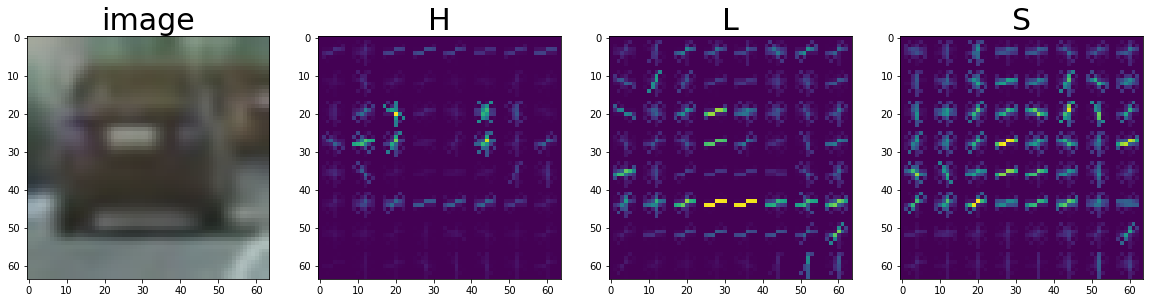

In [77]:
image = get_image(cars[1])
image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
featues, hog_image_r = get_hog_features(image[:,:,0],9,8,2,True,True)
featues, hog_image_g = get_hog_features(image[:,:,1],9,8,2,True,True)
featues, hog_image_b = get_hog_features(image[:,:,2],9,8,2,True,True)
plot_4_images(get_image(cars[0]),'image',hog_image_r,'H',hog_image_g,'L',hog_image_b,'S')

## Hog visualization in YUV

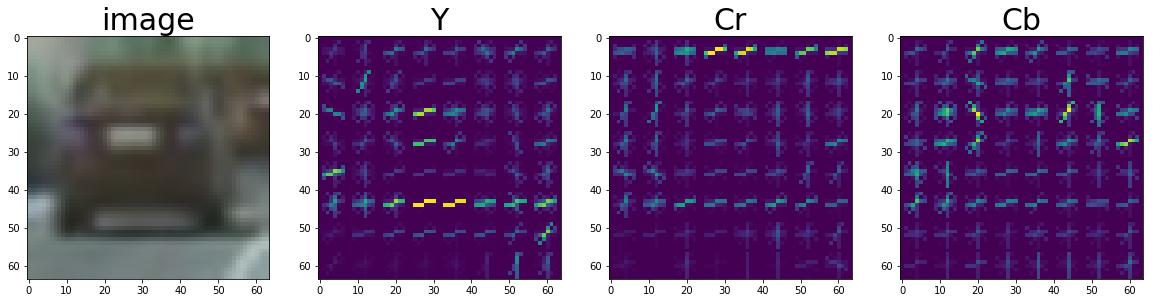

In [78]:
image = get_image(cars[1])
image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
featues, hog_image_r = get_hog_features(image[:,:,0],9,8,2,True,True)
featues, hog_image_g = get_hog_features(image[:,:,1],9,8,2,True,True)
featues, hog_image_b = get_hog_features(image[:,:,2],9,8,2,True,True)
plot_4_images(get_image(cars[0]),'image',hog_image_r,'Y',hog_image_g,'Cr',hog_image_b,'Cb')

# Color Histogram

In [79]:
def color_hist(img, nbins=16, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

In [80]:
def plot_image(img,text1,text2,text3):
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=16, bins_range=(0, 256))
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title(text1 + ' Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title(text2 + ' Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title(text3 + ' Histogram')
    fig.tight_layout()

In [81]:
def get_hist(img):
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=16, bins_range=(0, 256))
    return np.concatenate((rh[0],gh[0],bh[0]))

## RGB plot

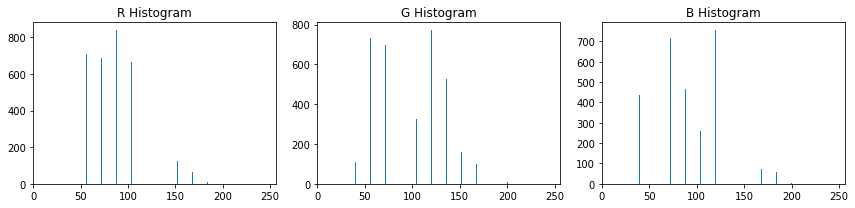

In [82]:
image = get_image(cars[1])
plot_image(image,'R','G','B')

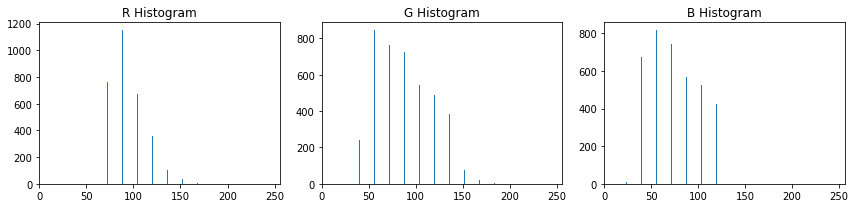

In [83]:
image = get_image(cars[2])
plot_image(image,'R','G','B')

In [84]:
## YUV Plot

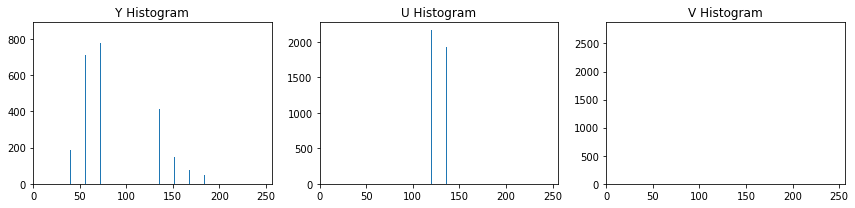

In [85]:
image = get_image(cars[1])
image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
plot_image(image,'Y','U','V')

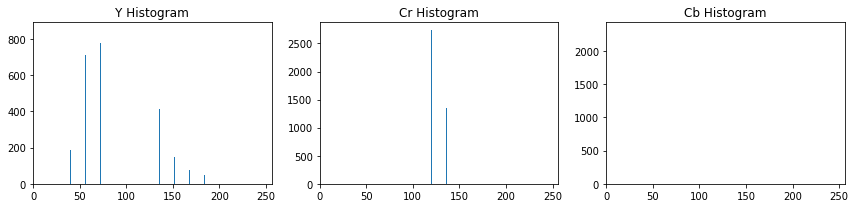

In [86]:
image = get_image(cars[1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
plot_image(image,'Y','Cr','Cb')

# Merging logic and extracting aggregated features

In [93]:
def bin_spatial(img, size=(16, 16)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

def extract_feature_from_single_image(image):
    features = []
    converted_image = cv2.cvtColor(image,cv2.COLOR_RGB2YCrCb)
        
    spatial_features = bin_spatial(converted_image)
    features.append(spatial_features)
    
    features.append(get_hist(converted_image))
    
    hog_features = []
    for channel in range(converted_image.shape[2]):
        hog_features.append(get_hog_features(image[:,:,channel],9,8,2,False,True))
    
    features.append(np.ravel(hog_features))
    return features


def extract_features(images):
    all_features = []
    for file in images:
        image = get_image(file)
        features = extract_feature_from_single_image(image)
        all_features.append(np.concatenate(features))
    return all_features

# Training the classifier

In [94]:
print("Loading", len(cars), "vehicle images...")
print("Loading", len(non_cars), "non-vehicle images...")


Loading 8792 vehicle images...
Loading 8968 non-vehicle images...


In [95]:
car_features = extract_features(cars)
non_car_features = extract_features(non_cars)

# X = np.vstack((car_features, non_car_features)).astype(np.float64)                        
X = np.vstack((car_features, non_car_features))                       

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = LinearSVC()

# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

# Check the prediction time for a single sample
t=time.time()


Feature vector length: 6108
16.38 Seconds to train SVC...
Test Accuracy of SVC =  0.982


## Creating classifier Function

[ 1.]


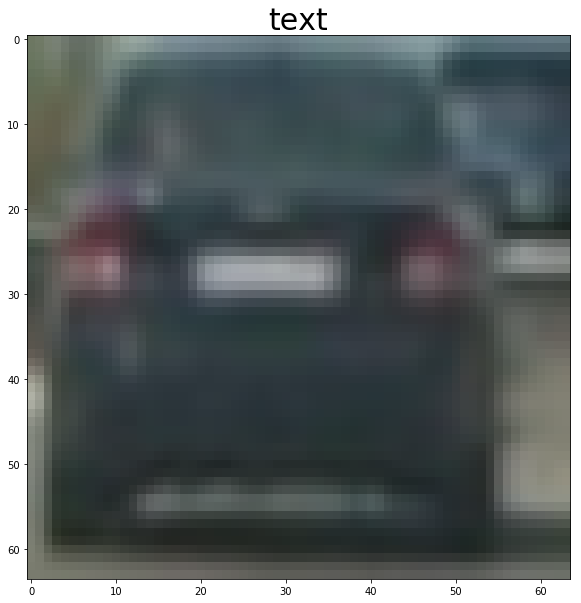

In [96]:
def classify(img):
    subimg = cv2.resize(img, (64,64))
    features = extract_feature_from_single_image(subimg)
    transformed_features = X_scaler.transform(np.hstack(features).reshape(1,-1))
    prediction = svc.predict(transformed_features)
    return prediction

image = cv2.imread('data/vehicles/GTI_MiddleClose/image0000.png')
image_display = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plot_1_image(image_display,'text')
prediction = classify(image)
print(prediction)

# Implement sliding window

In [200]:
def sliding_search(img, window_size = 100, offset = 20):
    ystart = 0
    ystop= 650
    pix_per_cell = 8
    cell_per_block = 2
    
    nxblocks = (img.shape[1] // window_size)
    nyblocks = (img.shape[0] // window_size)
    bboxes = []
    for x in range(0,img.shape[1],offset):
        for y in range(400,img.shape[0],offset):
            sub_image = img[y:y+window_size,x:x+window_size,]
            prediction = classify(sub_image)
#                 plot_1_image(sub_image,prediction)
            if(prediction>0.1):
                bboxes.append(((x,y),(x+window_size,y+window_size)))
    
    return bboxes

def find_cars(img):
    agg_boxes = []
    for size in range(70,150,50):
        box = sliding_search(img,size,int(size/10))
        agg_boxes.append(box)
    return agg_boxes
        
image = cv2.imread('test_images/test1.jpg')
all_boxes = find_cars(image)
# bboxes = find_cars(image)
# draw_img = evaluate_classification(image)
# plot_2_images(image,'image',draw_img,'classified image')

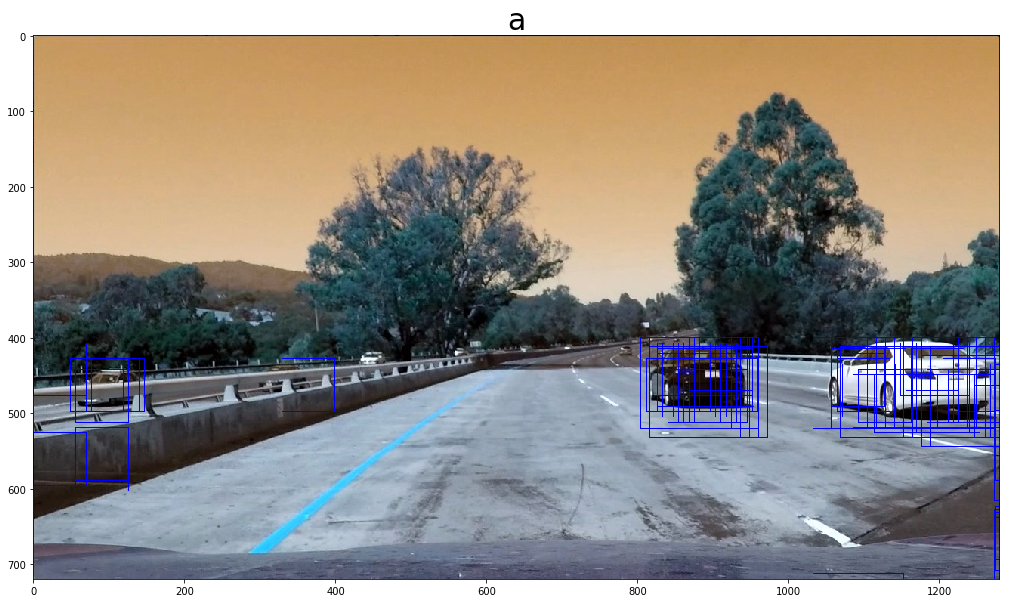

In [201]:
image_copy = np.copy(image)
for all_box in all_boxes:
    for label in all_box:
        cv2.rectangle(image_copy,label[0],label[1],(0,0,255),1)
    
plot_1_image(image_copy,'a')

2


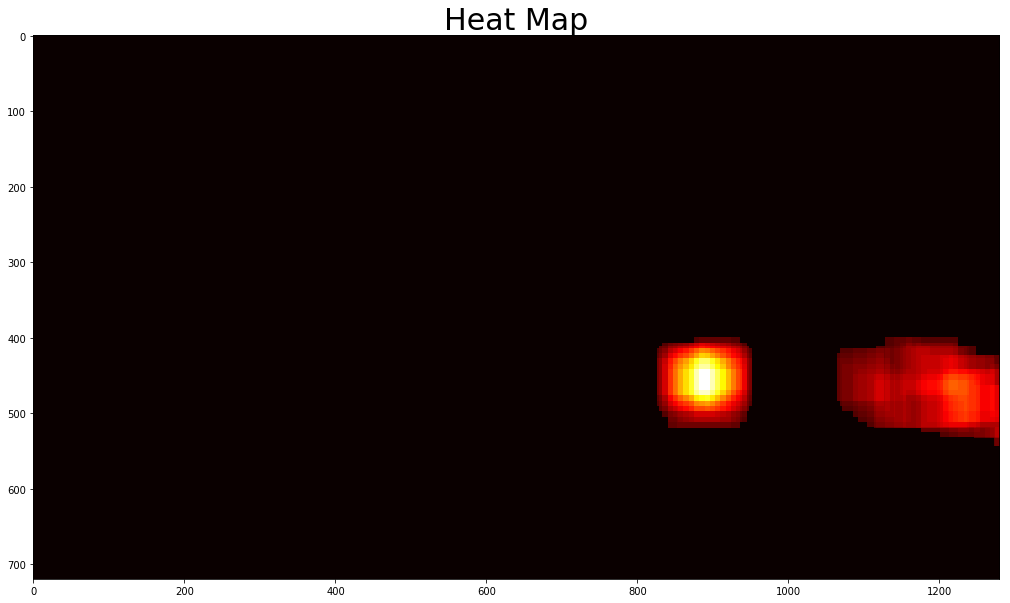

In [216]:
def get_heat(img, boxes):
    heat_map = np.zeros((img.shape[0],img.shape[1]))
    for all_box in boxes:
        for box in all_box:
            heat_map[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    heat_map[heat_map <= 5] = 0
    heat_map = np.clip(heat_map,0,255)
    return heat_map

heat_map = get_heat(image, all_boxes)
print(heat_map.ndim)
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(heat_map, cmap ='hot')
ax1.set_title('Heat Map', fontsize=30)
    

In [229]:
labels= sclabel(heat_map)
labels

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32), 2)

In [230]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


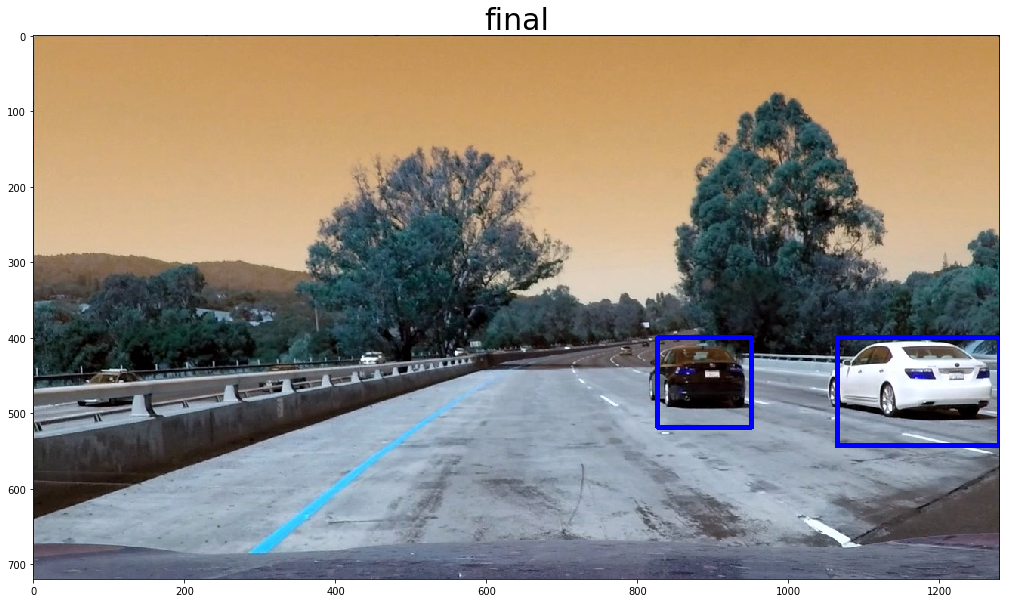

In [231]:
final_image = np.copy(image)
final_image = draw_labeled_bboxes(final_image,labels)
plot_1_image(final_image,'final')

In [ ]:
def detect_car(img):
    all_boxes = find_cars(image)
    heat_map = get_heat(img, all_boxes)
    labels= sclabel(heat_map)
    final_image = np.copy(img)
    final_image = draw_labeled_bboxes(final_image,labels)
    return final_image

image = cv2.imread('test_images/test1.jpg')
plot_1_image(detect_car(image),'final')

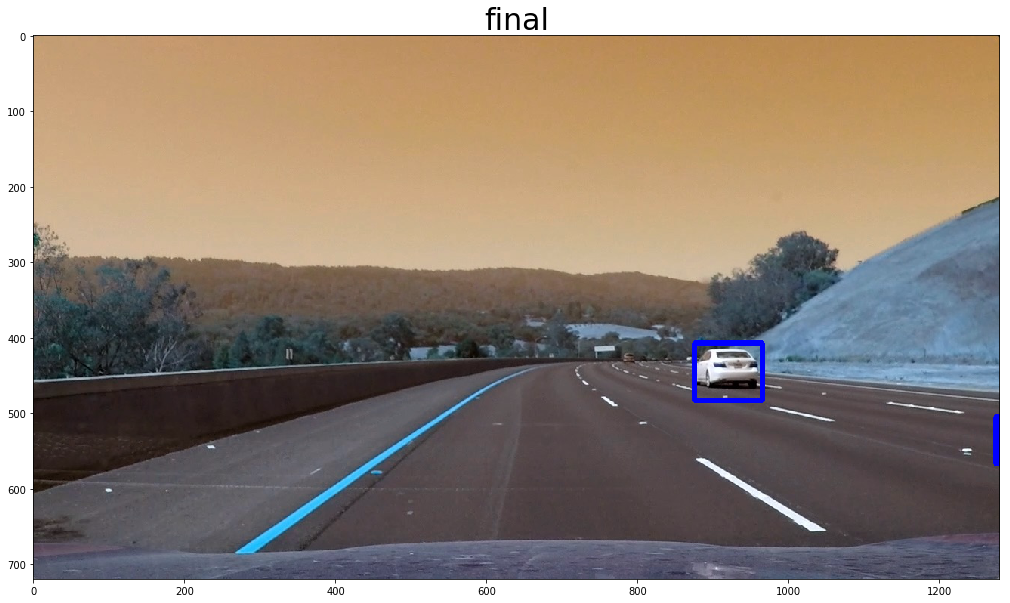

In [234]:
image = cv2.imread('test_images/test3.jpg')
plot_1_image(detect_car(image),'final')

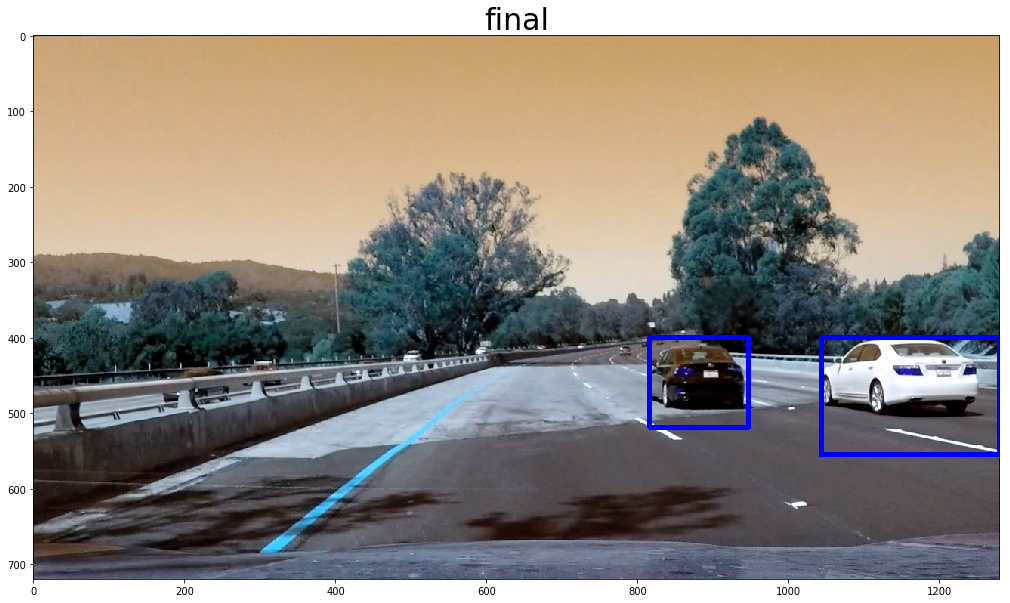

In [235]:
image = cv2.imread('test_images/test4.jpg')
plot_1_image(detect_car(image),'final')

In [241]:
project_output_file = "project_output.mp4"
project_video = VideoFileClip("project_video.mp4")

project_output = project_video.fl_image(detect_car)
%time project_output.write_videofile(project_output_file, audio=False)

[MoviePy] >>>> Building video project_output.mp4
[MoviePy] Writing video project_output.mp4



 73%|███████▎  | 916/1261 [00:19<00:07, 44.83it/s]


100%|█████████▉| 1260/1261 [00:27<00:00, 45.58it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output.mp4 

CPU times: user 2.94 s, sys: 3.05 s, total: 5.99 s
Wall time: 28.6 s
